In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Breast cancer dataset

bcdata = pd.read_csv(r"D:\R3SPAnalytics\01-SDP\Datasets\breast_cancer.csv", header=0)

# Copy to back-up file

bcdata_bk = bcdata.copy()

# Display first 5 records

bcdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Display the cancer data information

bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Display the unique values of all the variables

bcdata.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [7]:
# Display the unique values by count for 'diagnosis' 

bcdata['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

bcdata['diagnosis'] = LE.fit_transform(bcdata['diagnosis'])

In [8]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

diagnosis_count = bcdata.diagnosis.value_counts()
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')
print('Total records:', len(bcdata))

Class 0: 357
Class 1: 212
Proportion: 1.68 : 1
Total records: 569


In [9]:
# Displaying Duplicate values with in Loan ataset, if avialble

bcdata_dup = bcdata[bcdata.duplicated(keep='last')]
bcdata_dup

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [10]:
# Count the missing values by each variable, if available

bcdata.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Delte the unnamed column and variables which are not impacting the target variable

del bcdata['Unnamed: 32']
del bcdata['id']
bcdata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Display the Descriptive Statistics

bcdata.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [13]:
# Identify the independent and Target variables

IndepVar = []
for col in bcdata.columns:
    if col != 'diagnosis':
        IndepVar.append(col)

TargetVar = 'diagnosis'

x = bcdata[IndepVar]
y = bcdata[TargetVar]

In [14]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

# Display the sie of train and test datasets

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [15]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [16]:
# Load the result dataset for KNN

KNN_Results = pd.read_csv(r"D:\R3SPAnalytics\01-SDP\Datasets\KNN_Results.csv", header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[61  2]
 [ 9 99]]
Outcome values : 
 61 2 9 99
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.97      0.92        63
           0       0.98      0.92      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy : 93.6 %
Precision : 87.1 %
Recall : 96.8 %
F1 Score : 0.917
Specificity or True Negative Rate : 91.7 %
Balanced Accuracy : 94.2 %
MCC : 0.868
roc_auc_score: 0.942


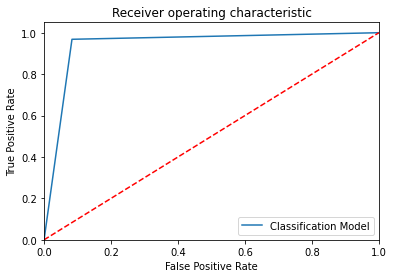

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 58   5]
 [  4 104]]
Outcome values : 
 58 5 4 104
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.92      0.93        63
           0       0.95      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 94.7 %
Precision : 93.5 %
Recall : 92.1 %
F1 Score : 0.928
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 94.2 %
MCC : 0.887
roc_auc_score: 0.942


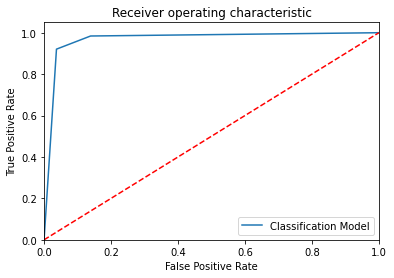

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 62   1]
 [  8 100]]
Outcome values : 
 62 1 8 100
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.98      0.93        63
           0       0.99      0.93      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 94.7 %
Precision : 88.6 %
Recall : 98.4 %
F1 Score : 0.932
Specificity or True Negative Rate : 92.6 %
Balanced Accuracy : 95.5 %
MCC : 0.893
roc_auc_score: 0.955


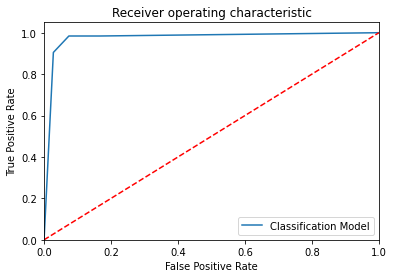

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


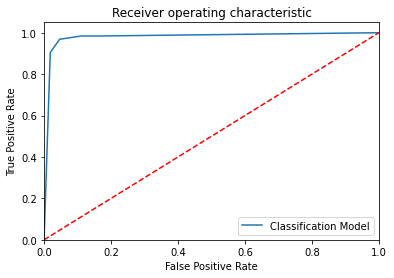

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 61   2]
 [  7 101]]
Outcome values : 
 61 2 7 101
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.97      0.93        63
           0       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 94.7 %
Precision : 89.7 %
Recall : 96.8 %
F1 Score : 0.931
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 95.2 %
MCC : 0.89
roc_auc_score: 0.952


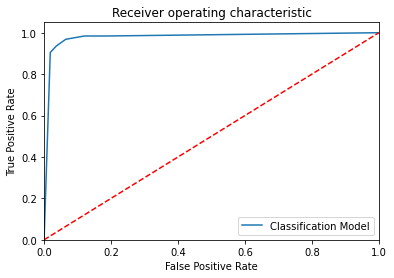

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


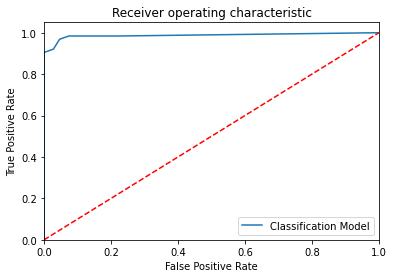

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 62   1]
 [  5 103]]
Outcome values : 
 62 1 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95        63
           0       0.99      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 92.5 %
Recall : 98.4 %
F1 Score : 0.954
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.9 %
MCC : 0.927
roc_auc_score: 0.969


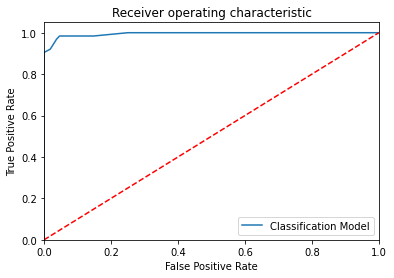

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 61   2]
 [  4 104]]
Outcome values : 
 61 2 4 104
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        63
           0       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 93.8 %
Recall : 96.8 %
F1 Score : 0.953
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 96.6 %
MCC : 0.925
roc_auc_score: 0.966


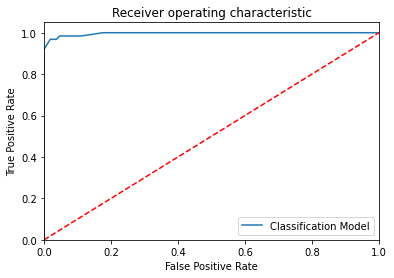

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


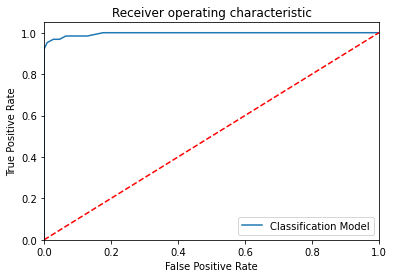

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


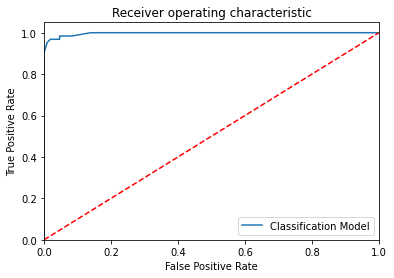

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 62   1]
 [  5 103]]
Outcome values : 
 62 1 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95        63
           0       0.99      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 92.5 %
Recall : 98.4 %
F1 Score : 0.954
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.9 %
MCC : 0.927
roc_auc_score: 0.969


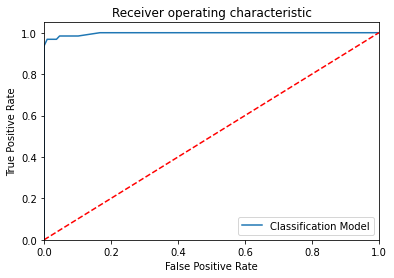

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


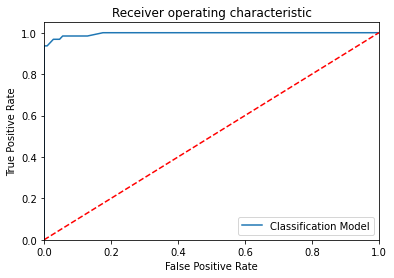

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


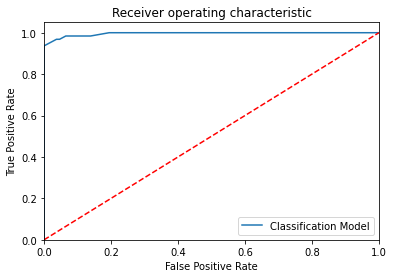

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 61   2]
 [  4 104]]
Outcome values : 
 61 2 4 104
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        63
           0       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 93.8 %
Recall : 96.8 %
F1 Score : 0.953
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 96.6 %
MCC : 0.925
roc_auc_score: 0.966


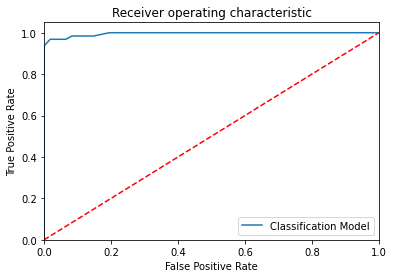

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 61   2]
 [  6 102]]
Outcome values : 
 61 2 6 102
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.97      0.94        63
           0       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 95.3 %
Precision : 91.0 %
Recall : 96.8 %
F1 Score : 0.938
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 95.6 %
MCC : 0.902
roc_auc_score: 0.956


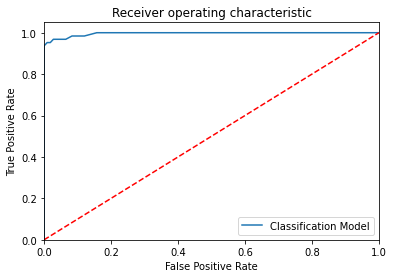

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 61   2]
 [  5 103]]
Outcome values : 
 61 2 5 103
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.97      0.95        63
           0       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy : 95.9 %
Precision : 92.4 %
Recall : 96.8 %
F1 Score : 0.946
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 96.1 %
MCC : 0.914
roc_auc_score: 0.961


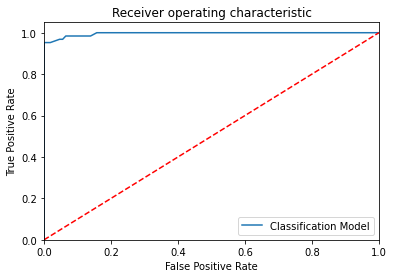

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 61   2]
 [  6 102]]
Outcome values : 
 61 2 6 102
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.97      0.94        63
           0       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 95.3 %
Precision : 91.0 %
Recall : 96.8 %
F1 Score : 0.938
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 95.6 %
MCC : 0.902
roc_auc_score: 0.956


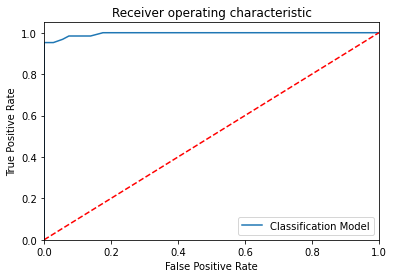

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 61   2]
 [  3 105]]
Outcome values : 
 61 2 3 105
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96        63
           0       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy : 97.1 %
Precision : 95.3 %
Recall : 96.8 %
F1 Score : 0.961
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 97.0 %
MCC : 0.937
roc_auc_score: 0.97


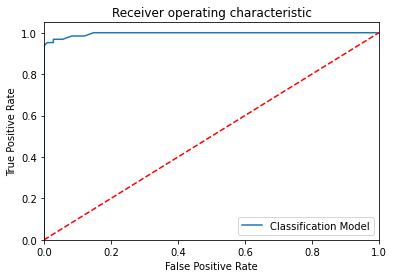

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 61   2]
 [  4 104]]
Outcome values : 
 61 2 4 104
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        63
           0       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 93.8 %
Recall : 96.8 %
F1 Score : 0.953
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 96.6 %
MCC : 0.925
roc_auc_score: 0.966


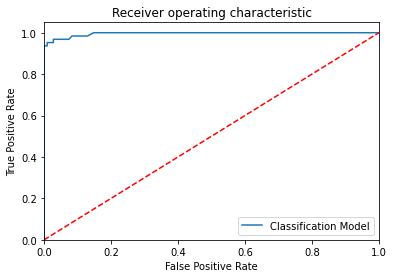

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 61   2]
 [  4 104]]
Outcome values : 
 61 2 4 104
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        63
           0       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy : 96.5 %
Precision : 93.8 %
Recall : 96.8 %
F1 Score : 0.953
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 96.6 %
MCC : 0.925
roc_auc_score: 0.966


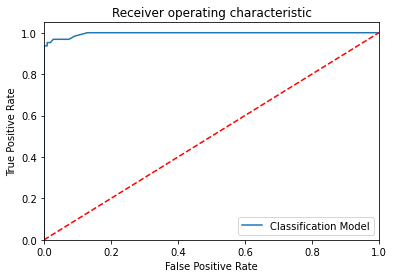

In [17]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

In [18]:
# Write the file

#KNN_Results.to_csv("D://00 Henotic//SRKR//Datasets//Results//KNN_Results_10.csv")

# Display the results

KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,61,2,9,99,0.936,0.871,0.968,0.917,0.917,0.868,0.942460,0.942
1,KNeighborsClassifier(n_neighbors=2),2,58,5,4,104,0.947,0.935,0.921,0.928,0.963,0.887,0.941799,0.942
2,KNeighborsClassifier(n_neighbors=3),3,62,1,8,100,0.947,0.886,0.984,0.932,0.926,0.893,0.955026,0.955
3,KNeighborsClassifier(n_neighbors=4),4,61,2,5,103,0.959,0.924,0.968,0.946,0.954,0.914,0.960979,0.961
4,KNeighborsClassifier(),5,61,2,7,101,0.947,0.897,0.968,0.931,0.935,0.890,0.951720,0.952
5,KNeighborsClassifier(n_neighbors=6),6,61,2,5,103,0.959,0.924,0.968,0.946,0.954,0.914,0.960979,0.961
6,KNeighborsClassifier(n_neighbors=7),7,62,1,5,103,0.965,0.925,0.984,0.954,0.954,0.927,0.968915,0.969
7,KNeighborsClassifier(n_neighbors=8),8,61,2,4,104,0.965,0.938,0.968,0.953,0.963,0.925,0.965608,0.966
8,KNeighborsClassifier(n_neighbors=9),9,61,2,5,103,0.959,0.924,0.968,0.946,0.954,0.914,0.960979,0.961
9,KNeighborsClassifier(n_neighbors=10),10,61,2,5,103,0.959,0.924,0.968,0.946,0.954,0.914,0.960979,0.961


# Compare the Classification Algorithms

In [19]:
# Load the results dataset

EMResults = pd.read_csv(r"D:\R3SPAnalytics\01-SDP\Datasets\Results\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 62   1]
 [  8 100]]
Outcome values : 
 62 1 8 100
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.98      0.93        63
           0       0.99      0.93      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy : 94.7 %
Precision : 88.6 %
Recall : 98.4 %
F1 Score : 0.932
Specificity or True Negative Rate : 92.6 %
Balanced Accuracy : 95.5 %
MCC : 0.893
roc_auc_score: 0.955


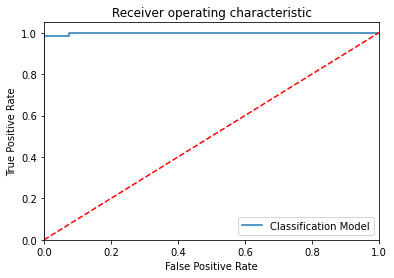

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[59  4]
 [17 91]]
Outcome values : 
 59 4 17 91
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.94      0.85        63
           0       0.96      0.84      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.89      0.87       171
weighted avg       0.89      0.88      0.88       171

Accuracy : 87.7 %
Precision : 77.6 %
Recall : 93.7 %
F1 Score : 0.849
Specificity or True Negative Rate : 84.3 %
Balanced Accuracy : 89.0 %
MCC : 0.756
roc_auc_score: 0.89


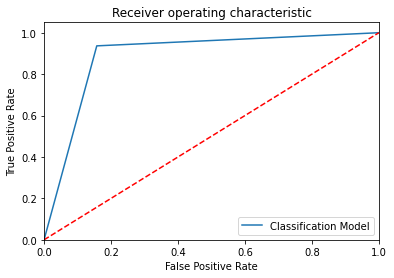

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[63  0]
 [10 98]]
Outcome values : 
 63 0 10 98
Classification report : 
               precision    recall  f1-score   support

           1       0.86      1.00      0.93        63
           0       1.00      0.91      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

Accuracy : 94.2 %
Precision : 86.3 %
Recall : 100.0 %
F1 Score : 0.926
Specificity or True Negative Rate : 90.7 %
Balanced Accuracy : 95.4 %
MCC : 0.885
roc_auc_score: 0.954


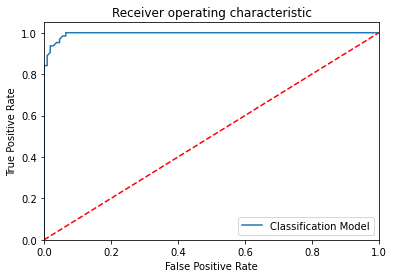

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[63  0]
 [11 97]]
Outcome values : 
 63 0 11 97
Classification report : 
               precision    recall  f1-score   support

           1       0.85      1.00      0.92        63
           0       1.00      0.90      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.95      0.94      0.94       171

Accuracy : 93.6 %
Precision : 85.1 %
Recall : 100.0 %
F1 Score : 0.92
Specificity or True Negative Rate : 89.8 %
Balanced Accuracy : 94.9 %
MCC : 0.874
roc_auc_score: 0.949


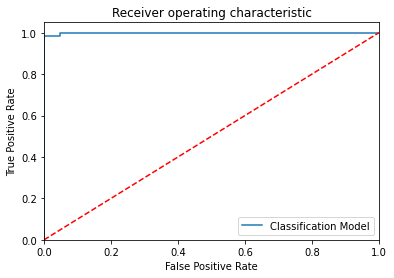

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 61   2]
 [  3 105]]
Outcome values : 
 61 2 3 105
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96        63
           0       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy : 97.1 %
Precision : 95.3 %
Recall : 96.8 %
F1 Score : 0.961
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 97.0 %
MCC : 0.937
roc_auc_score: 0.97


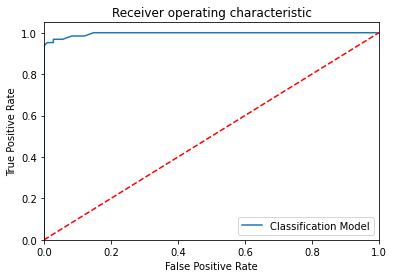

-----------------------------------------------------------------------------------------------------


In [20]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=18)
#ModelGNB = GaussianNB()
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [21]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D://R3SPAnalytics//01-SDP//Results//EMResults_02.csv")

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),62,1,8,100,0.947,0.886,0.984,0.932,0.926,0.893,0.955026,0.955
1,DecisionTreeClassifier(),59,4,17,91,0.877,0.776,0.937,0.849,0.843,0.756,0.889550,0.890
2,"(DecisionTreeClassifier(max_features='auto', r...",63,0,10,98,0.942,0.863,1.000,0.926,0.907,0.885,0.953704,0.954
3,"(ExtraTreeClassifier(random_state=2067536367),...",63,0,11,97,0.936,0.851,1.000,0.920,0.898,0.874,0.949074,0.949
4,KNeighborsClassifier(n_neighbors=18),61,2,3,105,0.971,0.953,0.968,0.961,0.972,0.937,0.970238,0.970


In [22]:
# Predict the values with KNN algorithm

y_predKNN = ModelKNN.predict(x_test)

In [25]:
Results = pd.DataFrame({'diagnosis_A':y_test, 'diagnosis_P':y_predKNN})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = bcdata_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_A,diagnosis_P
320,894604,B,10.250,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,0.1743,0.07279,0.3677,1.4710,1.597,22.68,0.010490,0.042650,0.040040,0.015440,0.02719,0.007596,11.28,20.61,71.53,390.4,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702,NaN,0,0
275,8911164,B,11.890,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.05875,0.6412,2.2930,4.021,48.84,0.014180,0.014890,0.012670,0.019100,0.02678,0.003002,12.40,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033,NaN,0,0
249,884689,B,11.520,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.012280,0.021050,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.13890,0.15820,0.18040,0.09608,0.2664,0.07809,NaN,0,0
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,NaN,1,1
284,8912284,B,12.890,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.033900,0.1432,0.05935,0.2913,1.3890,2.347,23.29,0.006418,0.039610,0.079270,0.017740,0.01878,0.003696,13.90,19.69,92.12,595.6,0.09926,0.23170,0.33440,0.10170,0.1999,0.07127,NaN,0,0
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.022570,0.2030,0.06552,0.2800,1.4670,1.994,17.85,0.003495,0.030510,0.034450,0.010240,0.02912,0.004723,12.02,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,NaN,0,0
567,927241,M,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.061580,0.071170,0.016640,0.02324,0.006185,25.74,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,NaN,1,1
204,87930,B,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.019110,0.027010,0.010370,0.01782,0.003586,14.97,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750,NaN,0,0
441,909445,M,17.270,25.42,112.40,928.8,0.08331,0.11090,0.120400,0.057360,0.1467,0.05407,0.5100,1.6790,3.283,58.38,0.008109,0.043080,0.049420,0.017420,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.14360,0.41220,0.50360,0.17390,0.2500,0.07944,NaN,1,1
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,NaN,1,1
